![Portada de Netflix](https://upload.wikimedia.org/wikipedia/commons/6/69/Netflix_logo.svg)

# Análisis del Catálogo de Netflix

## 1. Presentación del Problema de Negocio

Netflix necesita comprender el crecimiento de su catálogo, la predominancia de títulos de Estados Unidos y la frecuencia del género 'Drama'.

El objetivo es identificar patrones que permitan mejorar la estrategia de contenido y diversificación global.

In [1]:
# Librerías necesarias
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import classification_report, confusion_matrix
from sklearn.model_selection import train_test_split

In [2]:
# Cargar el dataset
# Especificar la ruta completa con el nombre del archivo
ruta = r"C:\Users\javie\OneDrive\Escritorio\eda_ml\src\data\netflix_titles.csv"  # Asegúrate de que el archivo exista en esta ruta

# Cargar el dataset
df = pd.read_csv(ruta)


## 2. Planteamiento del Problema Técnico

Utilizaremos EDA para identificar tendencias de crecimiento y distribución geográfica.

Aplicaremos modelos de clasificación binaria (Random Forest) para validar las hipótesis planteadas.

## 3. Descripción del Dataset y EDA


In [3]:
# Información general del dataset
print("Información del dataset:")
print(df.info())




Información del dataset:
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 8807 entries, 0 to 8806
Data columns (total 12 columns):
 #   Column        Non-Null Count  Dtype 
---  ------        --------------  ----- 
 0   show_id       8807 non-null   object
 1   type          8807 non-null   object
 2   title         8807 non-null   object
 3   director      6173 non-null   object
 4   cast          7982 non-null   object
 5   country       7976 non-null   object
 6   date_added    8797 non-null   object
 7   release_year  8807 non-null   int64 
 8   rating        8803 non-null   object
 9   duration      8804 non-null   object
 10  listed_in     8807 non-null   object
 11  description   8807 non-null   object
dtypes: int64(1), object(11)
memory usage: 825.8+ KB
None


In [5]:
# Comprobación de valores nulos
print("\nValores nulos:")
print(df.isnull().sum())


Valores nulos:
show_id            0
type               0
title              0
director        2634
cast             825
country          831
date_added        10
release_year       0
rating             4
duration           3
listed_in          0
description        0
dtype: int64


In [6]:

# Limpieza de datos: Imputación de valores faltantes
df['director'].fillna('Unknown', inplace=True)
df['cast'].fillna('Unknown', inplace=True)
df['country'].fillna('Unknown', inplace=True)
df['rating'].fillna(df['rating'].mode()[0], inplace=True)
df['duration'].fillna('Unknown', inplace=True)
df.dropna(subset=['date_added'], inplace=True)

C:\Users\javie\AppData\Local\Temp\ipykernel_18404\3109302908.py:2: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inplace=True)', try using 'df.method({col: value}, inplace=True)' or df[col] = df[col].method(value) instead, to perform the operation inplace on the original object.


  df['director'].fillna('Unknown', inplace=True)
C:\Users\javie\AppData\Local\Temp\ipykernel_18404\3109302908.py:3: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For examp

# Análisis de la Hipótesis 1: Crecimiento del Catálogo de Netflix

In [7]:
## Análisis Univariante
# Estadísticos de Centralidad y Dispersión
print("\nEstadísticos descriptivos del año de lanzamiento:")
print(df['release_year'].describe())


Estadísticos descriptivos del año de lanzamiento:
count    8797.000000
mean     2014.183472
std         8.822191
min      1925.000000
25%      2013.000000
50%      2017.000000
75%      2019.000000
max      2021.000000
Name: release_year, dtype: float64


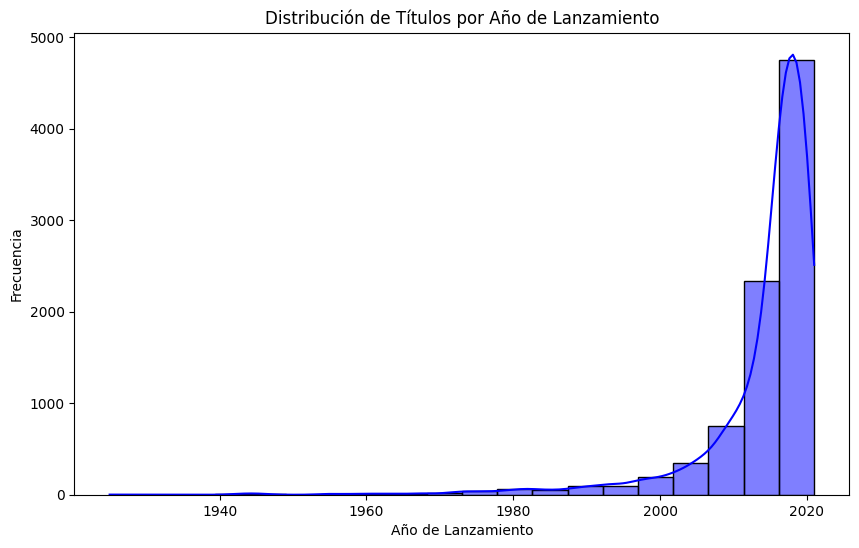

In [8]:
# Visualización: Histograma con KDE
plt.figure(figsize=(10,6))
sns.histplot(df['release_year'], bins=20, kde=True, color='blue')
plt.title("Distribución de Títulos por Año de Lanzamiento")
plt.xlabel("Año de Lanzamiento")
plt.ylabel("Frecuencia")
plt.show()

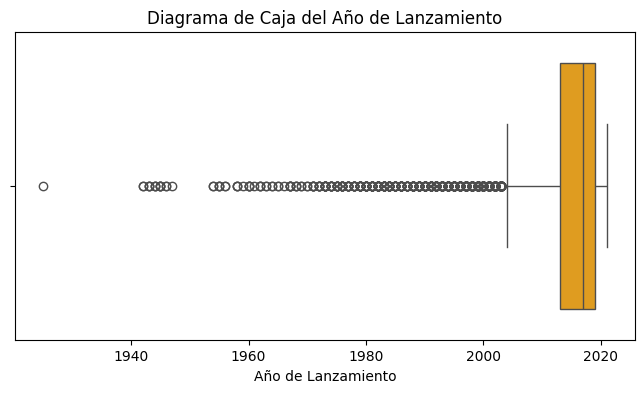

In [114]:
# Visualización: Boxplot
plt.figure(figsize=(8,4))
sns.boxplot(x=df['release_year'], color='orange')
plt.title("Diagrama de Caja del Año de Lanzamiento")
plt.xlabel("Año de Lanzamiento")
plt.show()

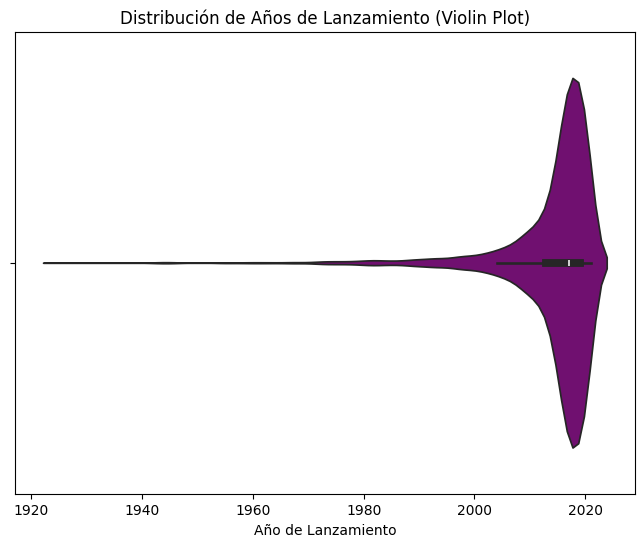

In [115]:
# Visualización: Violin Plot
plt.figure(figsize=(8,6))
sns.violinplot(x=df['release_year'], color='purple')
plt.title("Distribución de Años de Lanzamiento (Violin Plot)")
plt.xlabel("Año de Lanzamiento")
plt.show()

C:\Users\javie\AppData\Local\Temp\ipykernel_8972\2087313426.py:3: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.swarmplot(data=df, x='type', y='release_year', palette='viridis')
c:\Users\javie\AppData\Local\Programs\Python\Python312\Lib\site-packages\seaborn\categorical.py:3399: UserWarning: 74.8% of the points cannot be placed; you may want to decrease the size of the markers or use stripplot.
  warnings.warn(msg, UserWarning)
c:\Users\javie\AppData\Local\Programs\Python\Python312\Lib\site-packages\seaborn\categorical.py:3399: UserWarning: 71.9% of the points cannot be placed; you may want to decrease the size of the markers or use stripplot.
  warnings.warn(msg, UserWarning)
c:\Users\javie\AppData\Local\Programs\Python\Python312\Lib\site-packages\seaborn\categorical.py:3399: UserWarning: 82.4% of the points cannot be placed; you may want to de

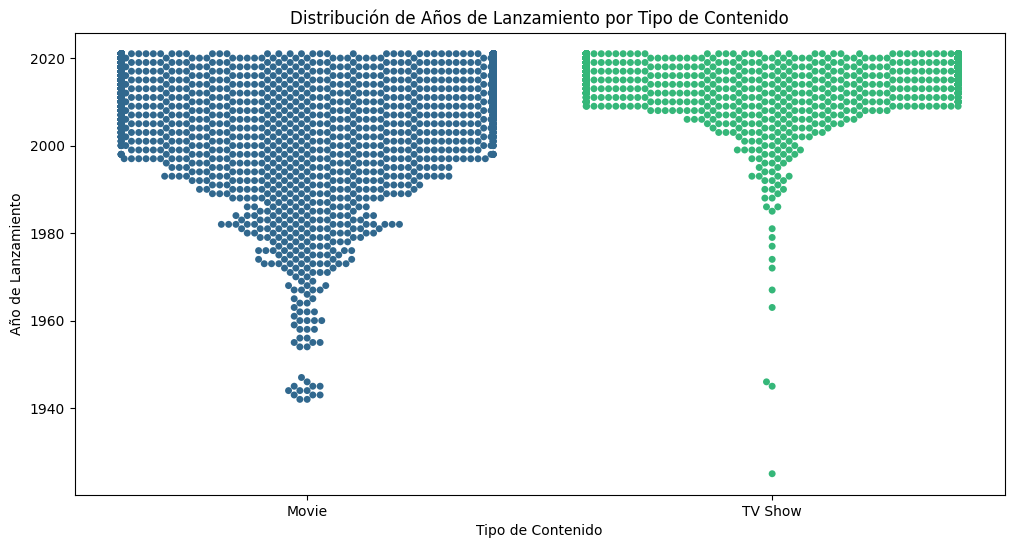

In [127]:
# Visualización: Swarm Plot
plt.figure(figsize=(12,6))
sns.swarmplot(data=df, x='type', y='release_year', palette='viridis')
plt.title("Distribución de Años de Lanzamiento por Tipo de Contenido")
plt.xlabel("Tipo de Contenido")
plt.ylabel("Año de Lanzamiento")
plt.show()

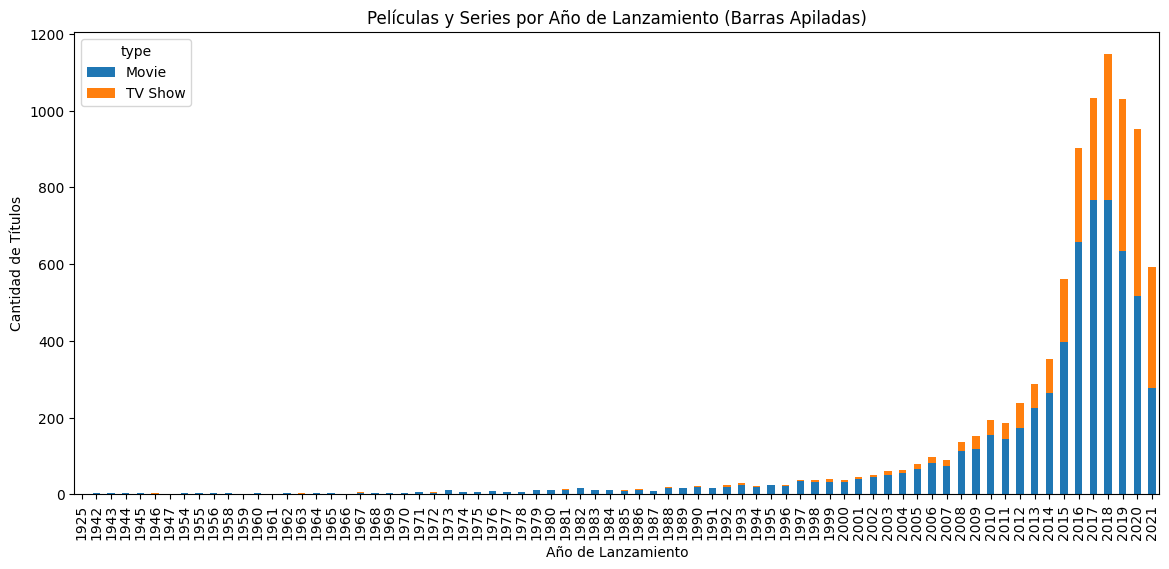

In [118]:
## Análisis Bivariante
# Agrupar títulos por año y tipo
df_type_year = df.groupby(['release_year', 'type']).size().unstack(fill_value=0)

# Gráfico de Barras Apiladas
df_type_year.plot(kind='bar', stacked=True, figsize=(14,6))
plt.title("Películas y Series por Año de Lanzamiento (Barras Apiladas)")
plt.xlabel("Año de Lanzamiento")
plt.ylabel("Cantidad de Títulos")
plt.show()

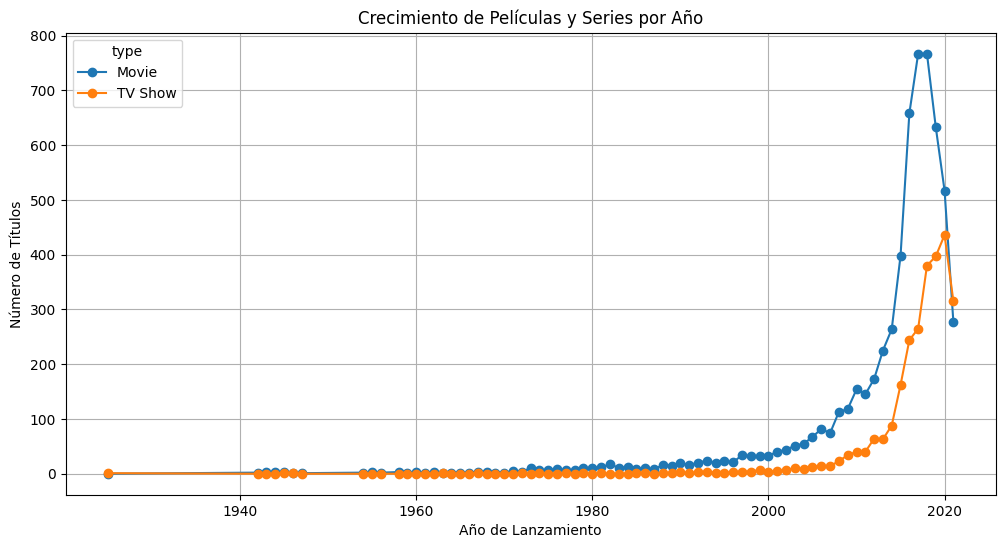

In [119]:
# Gráfico Comparativo: Películas vs Series por Año
df_type_year.plot(kind='line', marker='o', figsize=(12,6))
plt.title("Crecimiento de Películas y Series por Año")
plt.xlabel("Año de Lanzamiento")
plt.ylabel("Número de Títulos")
plt.grid(True)
plt.show()


<>:3: SyntaxWarning: invalid escape sequence '\d'
<>:3: SyntaxWarning: invalid escape sequence '\d'
C:\Users\javie\AppData\Local\Temp\ipykernel_8972\252799411.py:3: SyntaxWarning: invalid escape sequence '\d'
  df['duration_int'] = pd.to_numeric(df['duration'].str.extract('(\d+)')[0], errors='coerce')


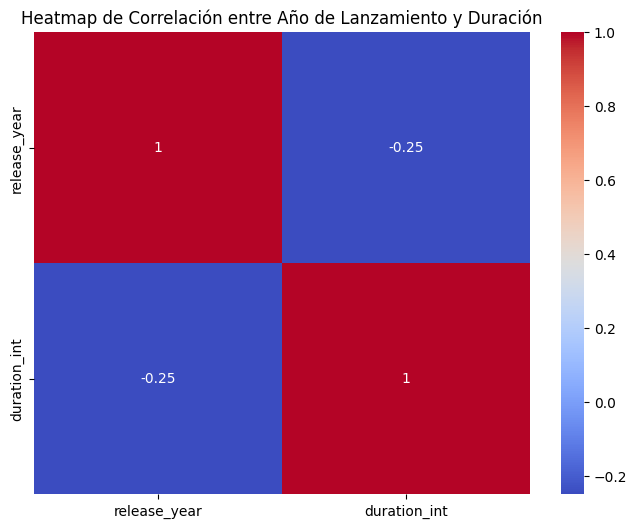

In [120]:
## Análisis Multivariante
# Heatmap de Correlación
df['duration_int'] = pd.to_numeric(df['duration'].str.extract('(\d+)')[0], errors='coerce')
plt.figure(figsize=(8, 6))
sns.heatmap(df[['release_year', 'duration_int']].corr(), annot=True, cmap='coolwarm')
plt.title("Heatmap de Correlación entre Año de Lanzamiento y Duración")
plt.show()

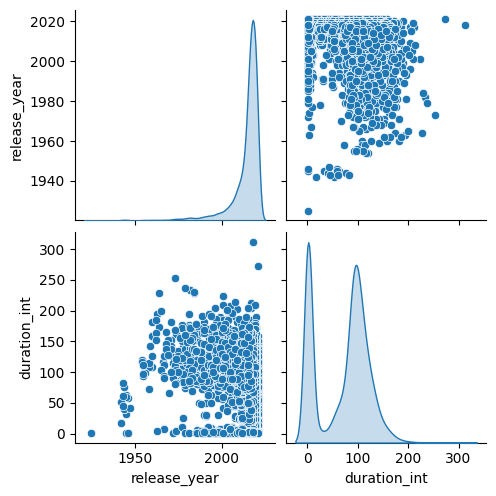

In [122]:
# Pairplot para observar relaciones cruzadas
sns.pairplot(df[['release_year', 'duration_int']], diag_kind='kde')
plt.show()


## Conclusión

 Los resultados confirman que el catálogo de Netflix ha crecido significativamente en los últimos años, especialmente entre 2012 y 2018.

 Aunque se observa una leve disminución después de 2019, el volumen total de títulos sigue siendo considerablemente alto.
 
 Además, las películas predominan frente a las series, aunque ambas han mostrado un crecimiento progresivo.


Objetivo del modelo: Predecir si un título es reciente (año de lanzamiento > 2016) basándose en:

tipo de contenido (película o serie)

país principal

duración

Valores nulos en X antes del procesamiento:
duration_int                 3
type_TV Show                 0
main_country_Argentina       0
main_country_Australia       0
main_country_Austria         0
                            ..
main_country_Uruguay         0
main_country_Venezuela       0
main_country_Vietnam         0
main_country_West Germany    0
main_country_Zimbabwe        0
Length: 88, dtype: int64
Fitting 3 folds for each of 216 candidates, totalling 648 fits
Mejores hiperparámetros: {'bootstrap': False, 'max_depth': 20, 'min_samples_leaf': 2, 'min_samples_split': 2, 'n_estimators': 200}

Reporte de Clasificación Mejorado:
              precision    recall  f1-score   support

           0       0.60      0.66      0.63       831
           1       0.67      0.61      0.64       931

    accuracy                           0.63      1762
   macro avg       0.64      0.64      0.63      1762
weighted avg       0.64      0.63      0.63      1762


Matriz de Confusión Mejorada:
[[

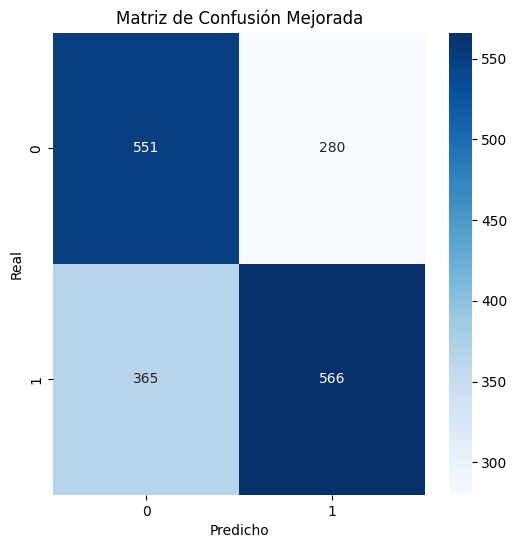

In [132]:
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import classification_report, confusion_matrix
from sklearn.model_selection import train_test_split, GridSearchCV
from imblearn.over_sampling import SMOTE

# Preparación de los datos
X = pd.get_dummies(df[['type', 'main_country', 'duration_int']], drop_first=True)
y = (df['release_year'] > 2016).astype(int)

# Verificar si hay valores nulos
print("Valores nulos en X antes del procesamiento:")
print(X.isnull().sum())

# Rellenar valores nulos con la mediana de la columna
X = X.fillna(X.median())

# Dividir los datos en entrenamiento y prueba
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Aplicar SMOTE para balancear clases
smote = SMOTE(random_state=42)
X_train_balanced, y_train_balanced = smote.fit_resample(X_train, y_train)

# Hiperparámetros para ajustar
param_grid = {
    'n_estimators': [50, 100, 200],
    'max_depth': [10, 20, 30, None],
    'min_samples_split': [2, 5, 10],
    'min_samples_leaf': [1, 2, 4],
    'bootstrap': [True, False]
}

# Modelo Random Forest con GridSearchCV para encontrar los mejores parámetros
rf = RandomForestClassifier(random_state=42)
grid_search = GridSearchCV(estimator=rf, param_grid=param_grid, 
                           cv=3, n_jobs=-1, verbose=2, scoring='accuracy')

# Entrenamiento con datos balanceados
grid_search.fit(X_train_balanced, y_train_balanced)

# Mejor modelo
best_rf = grid_search.best_estimator_
print(f"Mejores hiperparámetros: {grid_search.best_params_}")

# Predicción en el conjunto de prueba
y_pred = best_rf.predict(X_test)

# Evaluación del modelo mejorado
print("\nReporte de Clasificación Mejorado:")
print(classification_report(y_test, y_pred))
print("\nMatriz de Confusión Mejorada:")
print(confusion_matrix(y_test, y_pred))

# Visualización de la matriz de confusión
plt.figure(figsize=(6, 6))
sns.heatmap(confusion_matrix(y_test, y_pred), annot=True, fmt='d', cmap='Blues')
plt.title('Matriz de Confusión Mejorada')
plt.xlabel('Predicho')
plt.ylabel('Real')
plt.show()


In [87]:
# Hipótesis 2: La mayoría del contenido en Netflix proviene de Estados Unidos

# Análisis Univariante
print("\nEstadísticos descriptivos del país principal:")
print(df['country'].describe())
print("\nFrecuencia de países:")
print(df['country'].value_counts())


Estadísticos descriptivos del país principal:
count              8797
unique              749
top       United States
freq               2812
Name: country, dtype: object

Frecuencia de países:
country
United States                             2812
India                                      972
Unknown                                    830
United Kingdom                             418
Japan                                      244
                                          ... 
Romania, Bulgaria, Hungary                   1
Uruguay, Guatemala                           1
France, Senegal, Belgium                     1
Mexico, United States, Spain, Colombia       1
United Arab Emirates, Jordan                 1
Name: count, Length: 749, dtype: int64


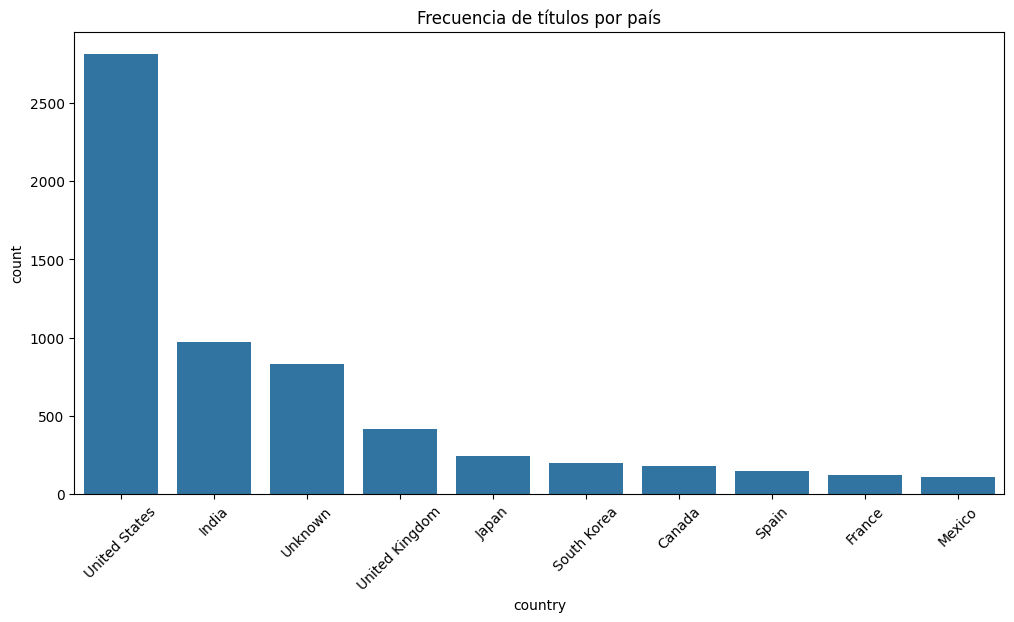

In [88]:
# Visualización Univariante: Histograma de países
plt.figure(figsize=(12, 6))
sns.countplot(data=df, x='country', order=df['country'].value_counts().index[:10])
plt.title('Frecuencia de títulos por país')
plt.xticks(rotation=45)
plt.show()


In [89]:

# Análisis Bivariante: Relación entre país y tipo de contenido
country_type = df.groupby(['country', 'type']).size().unstack()
print("\nConteo de títulos por país y tipo:")
print(country_type.head(10))


Conteo de títulos por país y tipo:
type                                                Movie  TV Show
country                                                           
, France, Algeria                                     1.0      NaN
, South Korea                                         NaN      1.0
Argentina                                            38.0     18.0
Argentina, Brazil, France, Poland, Germany, Den...    1.0      NaN
Argentina, Chile                                      2.0      NaN
Argentina, Chile, Peru                                1.0      NaN
Argentina, France                                     1.0      NaN
Argentina, France, United States, Germany, Qatar      1.0      NaN
Argentina, Italy                                      1.0      NaN
Argentina, Spain                                      7.0      1.0


<Figure size 1200x600 with 0 Axes>

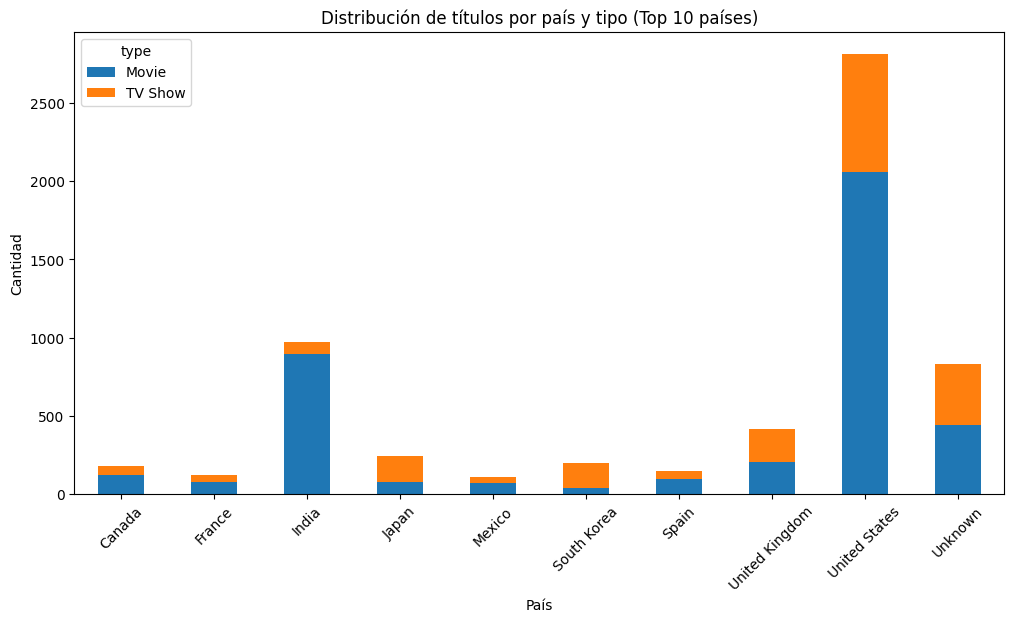

In [90]:
# Gráfico de barras apiladas mejorado
# Seleccionar los 10 países con más títulos
top_countries = df['country'].value_counts().index[:10]

# Filtrar el dataframe para los 10 países principales
df_top_countries = df[df['country'].isin(top_countries)]

# Agrupar por país y tipo (Movie/TV Show)
country_type = df_top_countries.groupby(['country', 'type']).size().unstack()

# Gráfico de barras apiladas
plt.figure(figsize=(12, 6))
country_type.plot(kind='bar', stacked=True, figsize=(12, 6))
plt.title('Distribución de títulos por país y tipo (Top 10 países)')
plt.xlabel('País')
plt.ylabel('Cantidad')
plt.xticks(rotation=45)
plt.show()


<>:2: SyntaxWarning: invalid escape sequence '\d'
<>:2: SyntaxWarning: invalid escape sequence '\d'
C:\Users\javie\AppData\Local\Temp\ipykernel_8972\796826554.py:2: SyntaxWarning: invalid escape sequence '\d'
  df['duration_int'] = pd.to_numeric(df['duration'].str.extract('(\d+)')[0], errors='coerce')


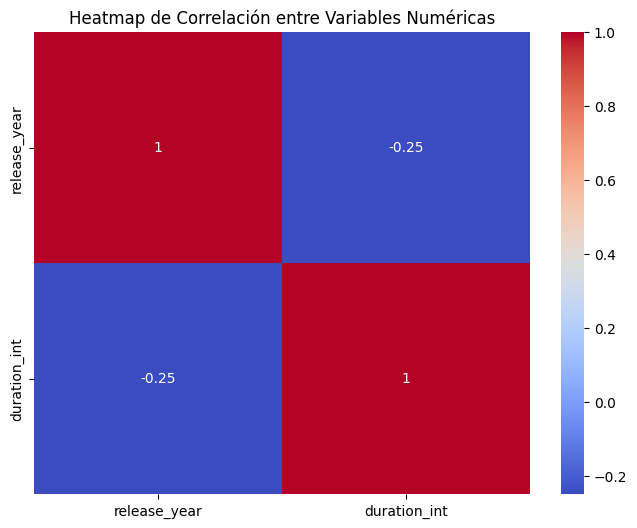

In [91]:
# Análisis Multivariante: Heatmap de correlación entre variables numéricas
df['duration_int'] = pd.to_numeric(df['duration'].str.extract('(\d+)')[0], errors='coerce')
plt.figure(figsize=(8, 6))
sns.heatmap(df[['release_year', 'duration_int']].corr(), annot=True, cmap='coolwarm')
plt.title('Heatmap de Correlación entre Variables Numéricas')
plt.show()




In [92]:
## 4. Conclusión
# El análisis confirma que la mayoría del contenido en Netflix proviene de Estados Unidos, especialmente en formato de películas.
# Otros países como India y Reino Unido también tienen una representación significativa, aunque mucho menor.

In [93]:

# Hipótesis 3: El género "Drama" es el más común en Netflix

## Análisis Univariante
# Estadísticos descriptivos del género
print("\nEstadísticos descriptivos del género:")
print(df['listed_in'].describe())



Estadísticos descriptivos del género:
count                             8797
unique                             513
top       Dramas, International Movies
freq                               362
Name: listed_in, dtype: object


In [94]:
# Conteo de géneros más comunes
genre_counts = df['listed_in'].value_counts().head(10)
print("\nGéneros más comunes:")
print(genre_counts)


Géneros más comunes:
listed_in
Dramas, International Movies                        362
Documentaries                                       359
Stand-Up Comedy                                     334
Comedies, Dramas, International Movies              274
Dramas, Independent Movies, International Movies    252
Kids' TV                                            219
Children & Family Movies                            215
Children & Family Movies, Comedies                  201
Documentaries, International Movies                 186
Dramas, International Movies, Romantic Movies       180
Name: count, dtype: int64


C:\Users\javie\AppData\Local\Temp\ipykernel_8972\2180135870.py:3: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x=genre_counts.values, y=genre_counts.index, palette='viridis')


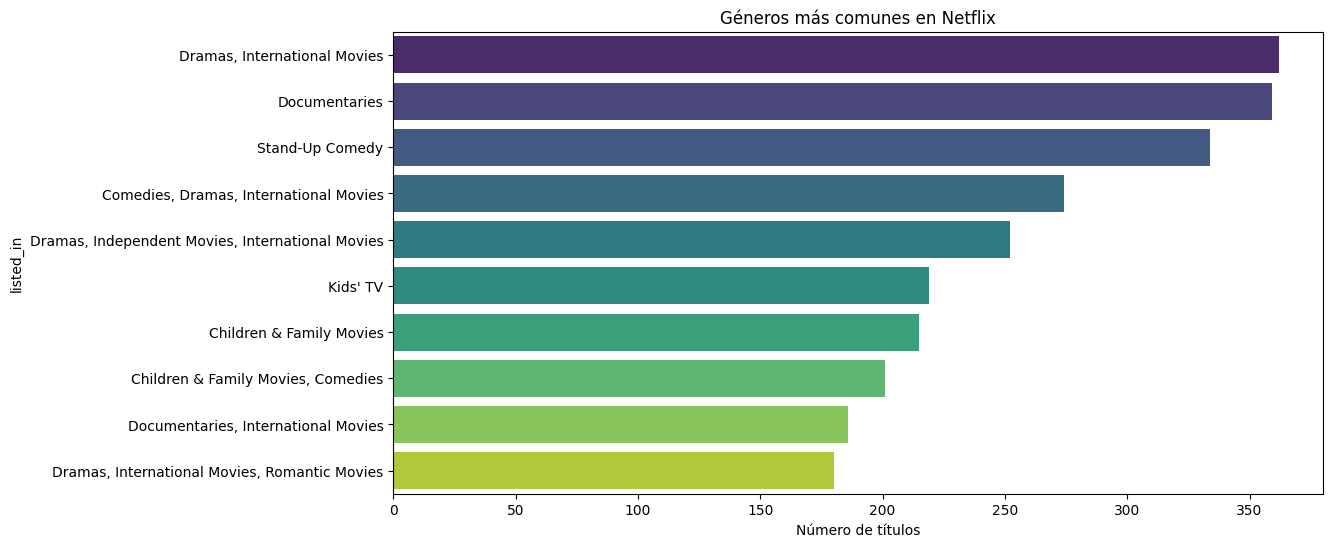

In [95]:
# Visualización Univariante: Gráfico de barras de los géneros más comunes
plt.figure(figsize=(12, 6))
sns.barplot(x=genre_counts.values, y=genre_counts.index, palette='viridis')
plt.title('Géneros más comunes en Netflix')
plt.xlabel('Número de títulos')
plt.show()


In [96]:
## Análisis Bivariante
# Comparar el género "Drama" en películas y series
drama_movies = df[df['listed_in'].str.contains('Dramas') & (df['type'] == 'Movie')].shape[0]
drama_tvshows = df[df['listed_in'].str.contains('TV Dramas') & (df['type'] == 'TV Show')].shape[0]

C:\Users\javie\AppData\Local\Temp\ipykernel_8972\1239951943.py:3: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x=['Movies', 'TV Shows'], y=[drama_movies, drama_tvshows], palette='magma')


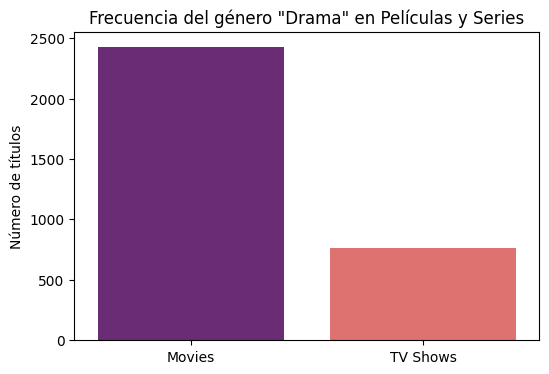

In [97]:
# Gráfico de barras para comparar
plt.figure(figsize=(6, 4))
sns.barplot(x=['Movies', 'TV Shows'], y=[drama_movies, drama_tvshows], palette='magma')
plt.title('Frecuencia del género "Drama" en Películas y Series')
plt.ylabel('Número de títulos')
plt.show()

<>:3: SyntaxWarning: invalid escape sequence '\d'
<>:3: SyntaxWarning: invalid escape sequence '\d'
C:\Users\javie\AppData\Local\Temp\ipykernel_8972\451740500.py:3: SyntaxWarning: invalid escape sequence '\d'
  df['duration_int'] = pd.to_numeric(df['duration'].str.extract('(\d+)')[0], errors='coerce')


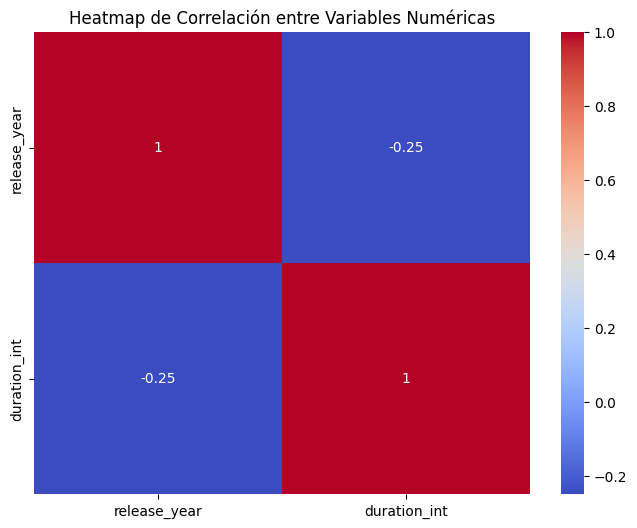

In [98]:



## Análisis Multivariante
# Heatmap de correlación entre variables numéricas
df['duration_int'] = pd.to_numeric(df['duration'].str.extract('(\d+)')[0], errors='coerce')
plt.figure(figsize=(8, 6))
sns.heatmap(df[['release_year', 'duration_int']].corr(), annot=True, cmap='coolwarm')
plt.title('Heatmap de Correlación entre Variables Numéricas')
plt.show()

## Conclusión
# El análisis confirma que el género "Drama" es predominante en el catálogo de Netflix, especialmente en formato de películas. Esto respalda la hipótesis planteada.


In [99]:

## Conclusión
# El análisis confirma que el género "Drama" es predominante en el catálogo de Netflix, especialmente en formato de películas. Esto respalda la hipótesis planteada.